In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from transformers import pipeline

# Web scraping  for CNBC
def scrape_cnbc():
    url = "https://www.cnbc.com/search/?query=green%20hydrogen&qsearchterm=green%20hydrogen"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    headlines = [headline.text.strip() for headline in soup.find_all('h3')]
    return headlines

#  Google News RSS feed
def fetch_google_news():
    url = "https://news.google.com/rss/search?q=green%20hydrogen&hl=en-IN&gl=IN&ceid=IN:en"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'xml')
    items = soup.find_all('item')
    headlines = [item.title.text.strip() for item in items]
    dates = [item.pubDate.text.strip() for item in items]
    return headlines, dates

# Sentiment analysis
def analyze_sentiment(text):
    sentiment_pipeline = pipeline("sentiment-analysis")
    result = sentiment_pipeline(text)
    return result[0]['label'], result[0]['score']

# Main script
cnbc_headlines = scrape_cnbc()
google_news_headlines, news_dates = fetch_google_news()

all_headlines = list(set(cnbc_headlines + google_news_headlines))
all_dates = [''] * len(all_headlines)

cnbc_flag = [True if headline in cnbc_headlines else False for headline in all_headlines]
google_flag = [True if headline in google_news_headlines else False for headline in all_headlines]

data = {
    'Headline': all_headlines,
    'Date': all_dates,
    'From_CNBC': cnbc_flag,
    'From_Google_News': google_flag
}

df = pd.DataFrame(data)

#sentment analysis
df['Sentiment_Label'], df['Sentiment_Score'] = zip(*df['Headline'].apply(analyze_sentiment))


print(df)

# dataframe to CSV
df.to_csv('news_data.csv', index=False)


In [6]:
print(df)

                                              Headline  Date  From_CNBC  \
0    Mumbai-Based Avaada Group Launches Green Hydro...   NaN      False   
1    Carbon Intensity Regulations: Key Determinant ...   NaN      False   
2    BPCL collaborates with CIAL to set up green hy...   NaN      False   
3    The cost of Green Hydrogen: What needs to happ...   NaN      False   
4    34 Companies Bid for Green Hydrogen Subsidies ...   NaN      False   
..                                                 ...   ...        ...   
97   Green Hydrogen Enabling Measures Roadmap for I...   NaN      False   
98   Germany Allocates €3.5 Billion to Fund Green H...   NaN      False   
99   Green Hydrogen Market Analysis: Rapid Expansio...   NaN      False   
100  Govt issues guidelines for using Green Hydroge...   NaN      False   
101  CIAL ties up with BPCL to set up green hydroge...   NaN      False   

     From_Google_News Sentiment_Label  Sentiment_Score  
0                True        POSITIVE     

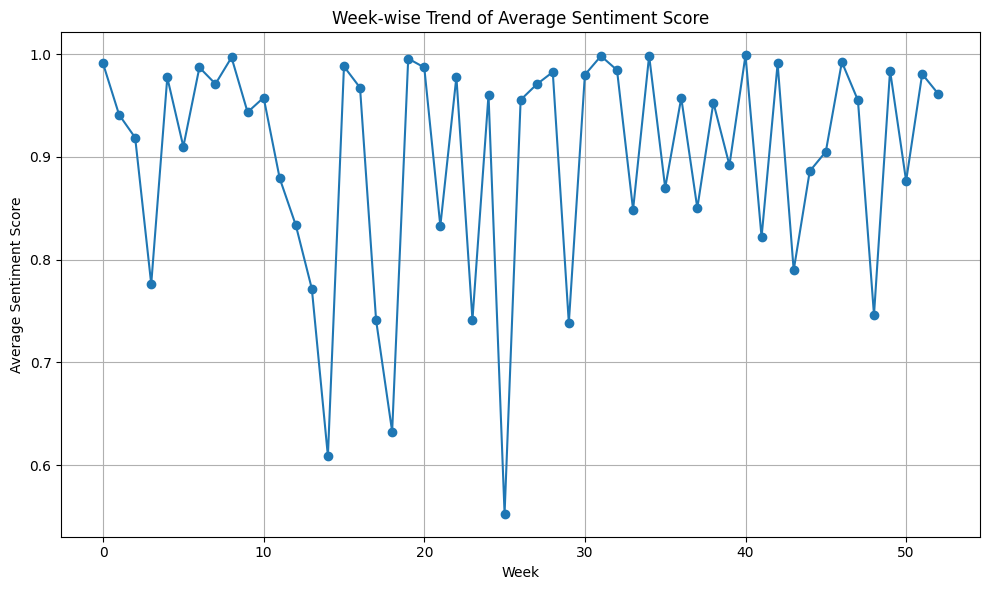

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('news_data.csv')

# Calculate the number of headlines per week (assuming each row represents a headline)
num_headlines_per_week = len(df) / 52  # Assuming 52 weeks in a year

# Create a list of week numbers for each headline
week_numbers = np.arange(1, len(df) + 1) // num_headlines_per_week

# Assign the week numbers to the DataFrame
df['Week_Number'] = week_numbers

# Group the DataFrame by week number and calculate the average sentiment score for each week
weekly_avg_sentiment = df.groupby('Week_Number')['Sentiment_Score'].mean()

# Plot the week-wise trend of the average sentiment score
plt.figure(figsize=(10, 6))
weekly_avg_sentiment.plot(kind='line', marker='o')
plt.title('Week-wise Trend of Average Sentiment Score')
plt.xlabel('Week')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.tight_layout()
plt.show()



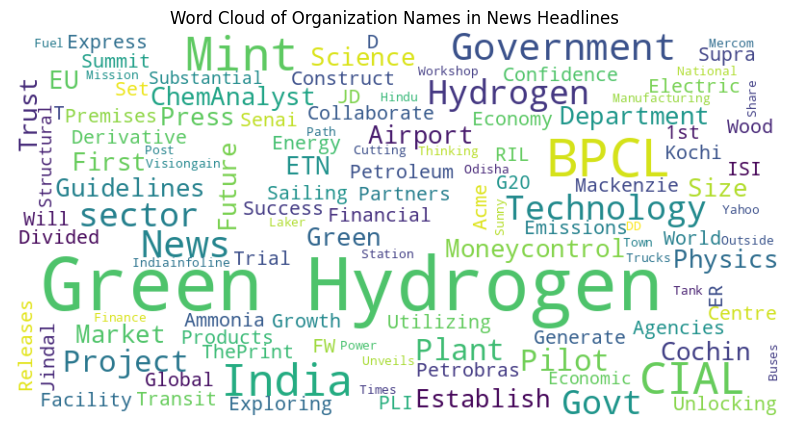

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import spacy

# Load English language model for spaCy
nlp = spacy.load('en_core_web_sm')

# Read the CSV file into a DataFrame
df = pd.read_csv('news_data.csv')

# Concatenate all headlines into a single string
all_headlines = ' '.join(df['Headline'])

# Define function to extract organization names using spaCy NER
def extract_organization_names(text):
    doc = nlp(text)
    organization_names = [entity.text for entity in doc.ents if entity.label_ == 'ORG']
    return organization_names

# Extract organization names from all headlines
all_organization_names = extract_organization_names(all_headlines)

# Convert the list of organization names into a space-separated string
organization_names_str = ' '.join(all_organization_names)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(organization_names_str)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Organization Names in News Headlines')
plt.axis('off')
plt.show()
